In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('../data/main.xlsx', header=0)
df.head()

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
0,Austria,8858775,39.7,10.4,18.40,71.4,39.6,21.69,1500.00,0.1
1,Belgium,11467923,21.2,18.0,20.55,74.5,48.2,19.80,1501.82,1.8
2,Bulgaria,7000039,9.5,13.0,6.68,66.4,33.4,40.46,184.07,1.9
3,Croatia,4076246,16.5,11.2,9.02,60.7,37.9,25.02,395.61,1.4
4,Cyprus,875898,22.4,30.2,8.85,76.3,22.4,39.97,870.00,1.4


Na początku sprobujmy użyć tylko najbardziej skorelowanych cech. Zgodnie z przyjętą podczas analizy eksploracyjnej zasadą, cechą dla której będziemy robili predykcję, jest cecha ```happiness```.

In [3]:
df.corr()['happiness'].sort_values()

education_underachievements   -0.556358
bad_conditions                -0.446700
unmet_medical_needs           -0.253131
population                    -0.090328
commute                        0.360781
health_estimate                0.489360
culture                        0.547529
minimum_wage                   0.616758
happiness                      1.000000
Name: happiness, dtype: float64

In [4]:
features = ['education_underachievements', 'bad_conditions', 'health_estimate', 'culture', 'minimum_wage']
# features = [f for f in df.columns if f not in ['country', 'happiness']]
target_feature = ['happiness']
features

['education_underachievements',
 'bad_conditions',
 'health_estimate',
 'culture',
 'minimum_wage']

Funkcja dla podziału na zbiór treningowy i testowy:

In [5]:
def split(dataframe):
    X_train, X_test, y_train, y_test = train_test_split(dataframe[features], dataframe[target_feature],
                                                    test_size=0.3, random_state=43)
    y_train = y_train.iloc[:,0].ravel()
    y_test = y_test.iloc[:,0].ravel()

    plt.figure(figsize=(10,7), dpi=100)
    for i, x_feature in enumerate(['education_underachievements', 'health_estimate', 'culture', 'minimum_wage']):
        plt.subplot(2, 2, i+1)
        plt.scatter(X_train[x_feature], y_train, label='Training Set')
        plt.scatter(X_test[x_feature], y_test, color='red', label='Testing Set')
        plt.xlabel(x_feature)
        plt.ylabel('happiness')
        plt.legend()
    return X_train, X_test, y_train, y_test

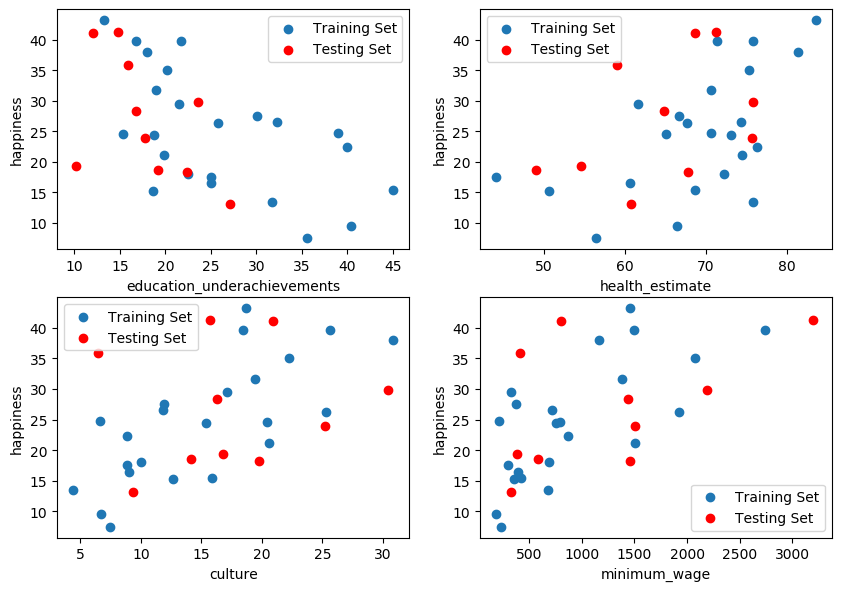

In [6]:
X_train, X_test, y_train, y_test = split(df)

Tę funkcję będziemy używali do wyznaczania tego, jak dobrze działają różne modele regresji.

In [20]:
def check_regressor(reg_model, graph=True, verbose=True, tree=False):
    
    reg_model.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    print(y_pred)
    print(y_test)
    score = reg_model.score(X_test, y_test)
    
    if verbose:
        print(reg_model.__class__.__name__, score)
    
    if graph:
        x_feature = 'health_estimate'
        plt.scatter(X_test[x_feature], y_test, color='red', label='Testing Set')
        plt.scatter(X_test[x_feature], y_pred, color='black', label='Prediction')
        plt.xlabel(x_feature)
        plt.ylabel('happiness')
        plt.legend()
        
    if tree:
        print(reg_model.n_features_)
        print(reg_model.feature_importances_)
        print(reg_model.max_features_)
        print(reg_model.n_outputs_)
        
    return score

Jak widać z wykresów powyżej, zebrane dane praktycznie nie układają się pięknie według trendu, więc predykcja za pomocą regresji może być nieco skomplikowanym zadaniem. Nie pomaga też i ilość danych: tylko 33 próbki na 5 dobrze skorelowanych cech.

Metody które zostałe użyte:
* Zwykła regresja liniowa (porażka - bardzo mało danych).
* Regresja wieloraka z potęgowaniem każdej z cech (porażka - za szybko rośnie wariancja).
* Metody z regularyzacją: Ridge i Lasso regression (???)
* Ridge i Lasso z walidacją krzyżową (???)
* Metody z regularyzacją z potęgowaniem (???)
* Drzewa decyzyjne i lase losowe (???)
* Wyskalowanie cech (???)

## Linear Regression

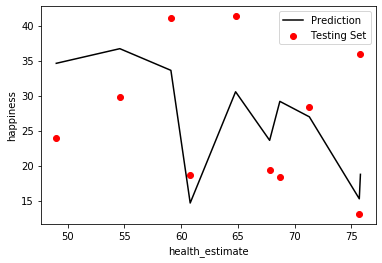

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

x_feature = 'health_estimate'
plt.scatter(sorted(X_test[x_feature]), y_test, color='red', label='Testing Set')
plt.plot(sorted(X_test[x_feature]), y_pred, color='black', label='Prediction')
plt.xlabel(x_feature)
plt.ylabel('happiness')
plt.legend()

## Ridge

In [36]:
from sklearn.linear_model import Ridge

[32.33844348 35.83913588 29.16346838 17.89986772 40.06589902 22.13892835
 29.46840018 28.97526755 17.18951858 20.6215928 ]
[23.9  29.82 41.1  18.6  41.3  19.4  18.3  28.3  13.1  35.9 ]
Ridge 0.2938887294472553


0.2938887294472553

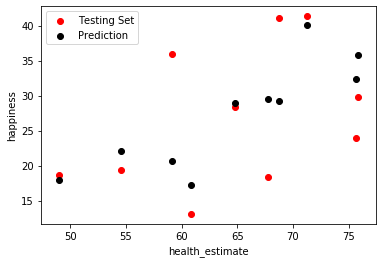

In [37]:
ridge = Ridge(alpha=1000.0)
check_regressor(ridge, graph=True)

## Lasso

In [41]:
from sklearn.linear_model import Lasso

[34.58988791 36.69180288 33.57231046 14.67722927 30.6042549  23.59651231
 29.17427882 26.97404665 15.27048873 18.76092336]
[23.9  29.82 41.1  18.6  41.3  19.4  18.3  28.3  13.1  35.9 ]
Lasso 0.1278659111289343


0.1278659111289343

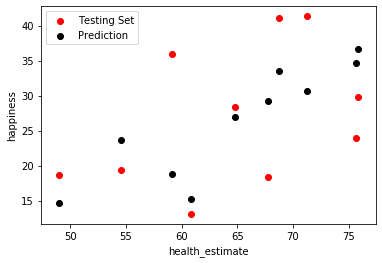

In [49]:
lasso = Lasso(alpha=0.05)
check_regressor(lasso, graph=True)

## Ridge/Lasso with Cross-Validation

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
check_regressor(DecisionTreeRegressor(), tree=True)

In [ ]:
mds = []
for md in range(1, 30, 1):
    tree_reg = DecisionTreeRegressor(max_depth=md)
    s = check_regressor(tree_reg, graph=False, verbose=False)
    mds.append(s)
    print(f'MaxDepth={md}: {s}')
plt.plot(list(range(1, 30)), mds)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_leaf_nodes=16)
check_regressor(model)

## Scaling

In [ ]:
df.head()

In [ ]:
from sklearn import preprocessing

def skaluj(df):
    cols_to_drop = ['country']
    cols = [e for e in df.columns if e not in cols_to_drop]

    x = df.drop(cols_to_drop, axis=1).values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_std = pd.DataFrame(x_scaled, columns=cols)
    df_std.index = df['country']
    print(df_std.shape)
    return df_std

In [ ]:
df_std = skaluj(df)

In [ ]:
df_std.head()

In [ ]:
X_train, X_test, y_train, y_test = split(df_std)

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
X_train.head()

In [ ]:
def produce_matrix(dataframe, n):
    d = dataframe.copy()
    d_col = d.columns
    for st in range(2, n+1):
        for fea in d_col:
            d[f'{fea}^{st}'] = d[fea]**st
    d.insert(0, 'intercept', 1.0)
    return d

In [ ]:
s = 7
# X_train_pow = produce_matrix(X_train, stopen)
# X_test_pow = produce_matrix(X_test, stopen)

# a = produce_matrix(pd.DataFrame(X_train['education_underachievements']), 2)
# b = produce_matrix(pd.DataFrame(X_test['education_underachievements']), 2)

a = pd.DataFrame(X_train['education_underachievements'])
a = produce_matrix(a, s)
a


b = pd.DataFrame(X_test['education_underachievements'])
b = produce_matrix(b, s)
b

# X_train_pow = np.array(a).reshape(-1,1)
# X_test_pow = np.array(b).reshape(-1,1)

# X_test_pow
# b
model = LinearRegression()
model.fit(a, y_train)
y_pred = model.predict(b)

plt.scatter(X_test['education_underachievements'], y_test, color='red')
plt.scatter(X_test['education_underachievements'], y_pred, color='black')

# model.score(X_test_pow, y_test)
# y_pred

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_, y_train)
y_pred = model.predict(X_test_)
y_pred

In [ ]:
x_feature = 'health_estimate'
plt.scatter(X_test[x_feature], y_test, color='red', label='Testing Set')
plt.scatter(X_test[x_feature], y_pred, color='black', label='Prediction')
plt.xlabel(x_feature)
plt.ylabel('happiness')
plt.legend()

In [ ]:
X_train.head()
# df[features]